In [1]:
%reload_kedro

# Load the unannotated data.
clips = catalog.load("tfrecord_unannotated_no_wheel_combined")

2022-06-07 18:23:57,776 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /home/daniel/git/mot
2022-06-07 18:23:58,128 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-07 18:23:58,303 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-07 18:23:58,304 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-07 18:23:58,305 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-07 18:23:58,306 - kedro.io.core - WARNING - `version` attribute removed from data set configuration since it is a reserved word and cannot be directly specified
2022-06-07 18:23:58,321 - kedro.extras.extensions.ipython - IN

2022-06-07 18:23:58.322 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:47 - Loading TFRecords from /home/daniel/git/mot/data/05_model_input/unannotated/no_wheel.
2022-06-07 18:23:58.470 | DEBUG    | cotton_flower_mot.data_sets.tf_records_data_set:_load:53 - Loading 3214 TFRecords files from directory.
2022-06-07 18:23:58.481663: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-07 18:23:58.481682: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-07 18:23:58.481693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (twilight-sparkle): /proc/driver/nvidia/version does not exist
2022-06-07 18:23:58.481998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with one

In [2]:
from cotton_flower_mot.pipelines.dataset_io import colorization_inputs_and_targets_from_dataset
from cotton_flower_mot.pipelines.config import ModelConfig

# Create the preprocessing pipeline.
config = ModelConfig(image_input_shape=(100, 100, 3), frame_input_shape=(1080, 1920, 3), detection_model_input_shape=(540, 960, 3),
                     rot_net_input_shape=(360, 360, 3), colorization_input_shape=(270, 480, 3), num_appearance_features=128, num_gcn_channels=128, sinkhorn_lambda=10.0, num_reduction_stages=2,
                     detection_sigma=3, nominal_detection_size=(0.052, 0.093))
preprocessed = colorization_inputs_and_targets_from_dataset(clips, config=config)

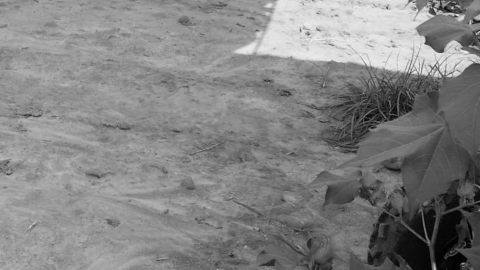

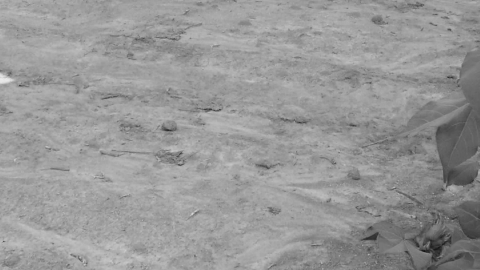

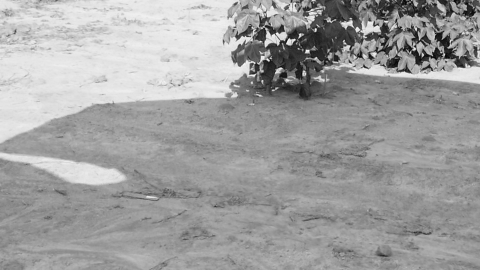

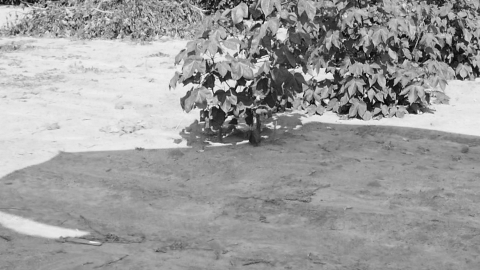

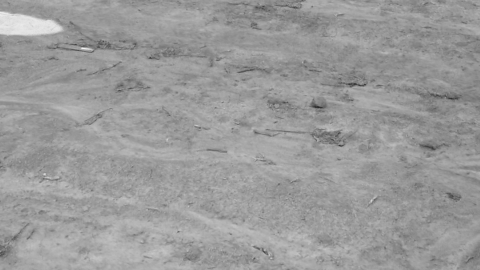

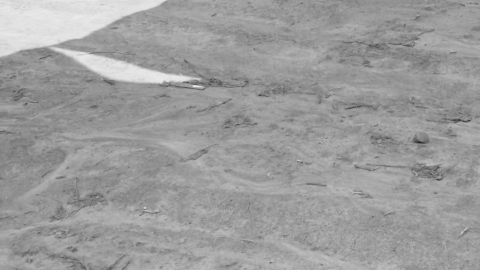

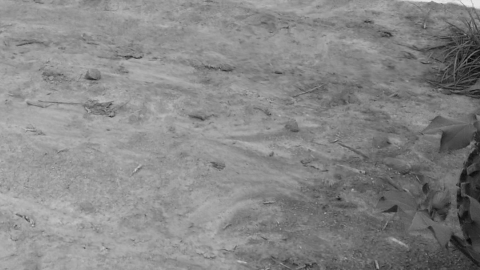

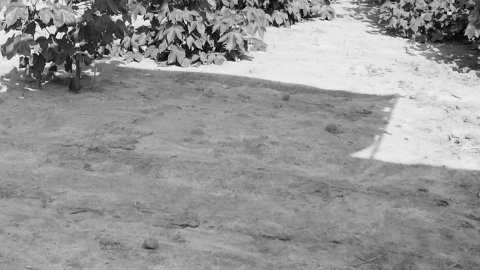

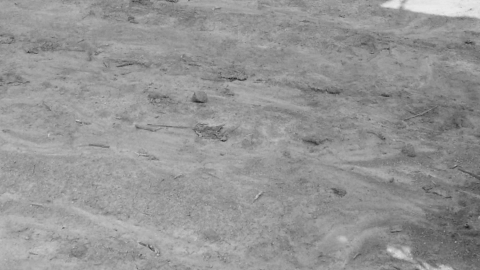

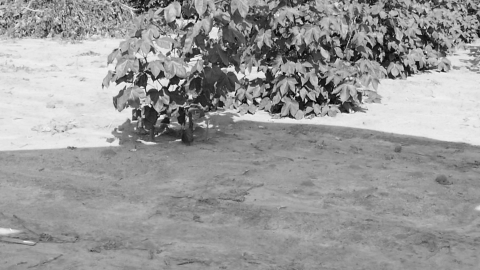

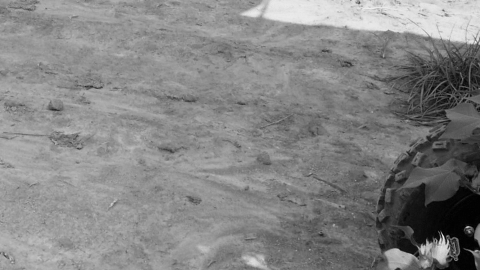

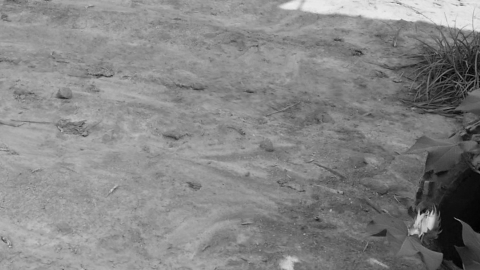

In [3]:
import itertools
from PIL import Image
from IPython.display import display

# Sample the data.
for inputs, targets in itertools.islice(preprocessed.unbatch(), 12):
    # Convert BGR to RGB,
    image = Image.fromarray(inputs["frame"].numpy()[..., ::-1])
    display(image)

In [4]:
dataset_iter = iter(preprocessed)

In [5]:
next(dataset_iter)

({'frame': <tf.Tensor: shape=(32, 270, 480), dtype=uint8, numpy=
  array([[[ 82,  47,  32, ..., 203, 208, 217],
          [ 50,  57,  40, ..., 206, 206, 211],
          [ 52,  44,  30, ..., 218, 218, 221],
          ...,
          [149, 148, 151, ..., 146, 142, 134],
          [148, 148, 152, ..., 137, 137, 136],
          [146, 146, 144, ..., 138, 136, 134]],
  
         [[142, 149, 205, ..., 133, 133, 141],
          [126, 155, 212, ..., 134, 138, 143],
          [208, 210, 213, ..., 155, 149, 156],
          ...,
          [113, 114, 111, ..., 149, 144, 130],
          [123, 127, 123, ..., 161, 156, 154],
          [118, 117, 110, ..., 166, 167, 159]],
  
         [[188, 186, 185, ..., 187, 187, 183],
          [216, 215, 215, ..., 181, 173, 151],
          [212, 213, 214, ..., 155, 158, 158],
          ...,
          [ 68,  66,  71, ..., 158, 156, 150],
          [ 68,  68,  69, ..., 155, 152, 150],
          [ 63,  68,  69, ..., 137, 131, 129]],
  
         ...,
  
         [[133,